<a href="https://colab.research.google.com/github/Ysmari09/Domina-Python-3249002/blob/main/Proyecto_de_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Exploración de los datos**


**1.1 Información general (tipos de datos y valores nulos)**

In [1]:
import pandas as pd

datos_store = pd.read_csv('store.csv')
datos_test = pd.read_csv('test.csv')
datos_train = pd.read_csv('train.csv')

/tmp/ipython-input-3363214084.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_train = pd.read_csv('train.csv')


In [2]:
datos_store.info()
datos_test.info()
datos_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  -

**# 1.2 Revisar las primeras filas de cada dataset**

In [3]:
datos_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
datos_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
datos_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


**1.3 Valores faltantes por columna**

In [6]:
datos_store.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [7]:
datos_test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0


In [8]:
datos_train.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


**1.4 Dimensiones de los datasets**

In [9]:
datos_store.shape

(1115, 10)

In [10]:
datos_test.shape

(41088, 8)

In [11]:
datos_train.shape

(1017209, 9)

**1.5 Resumen estadístico de variables numéricas**

In [12]:
datos_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [13]:
datos_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [14]:
datos_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

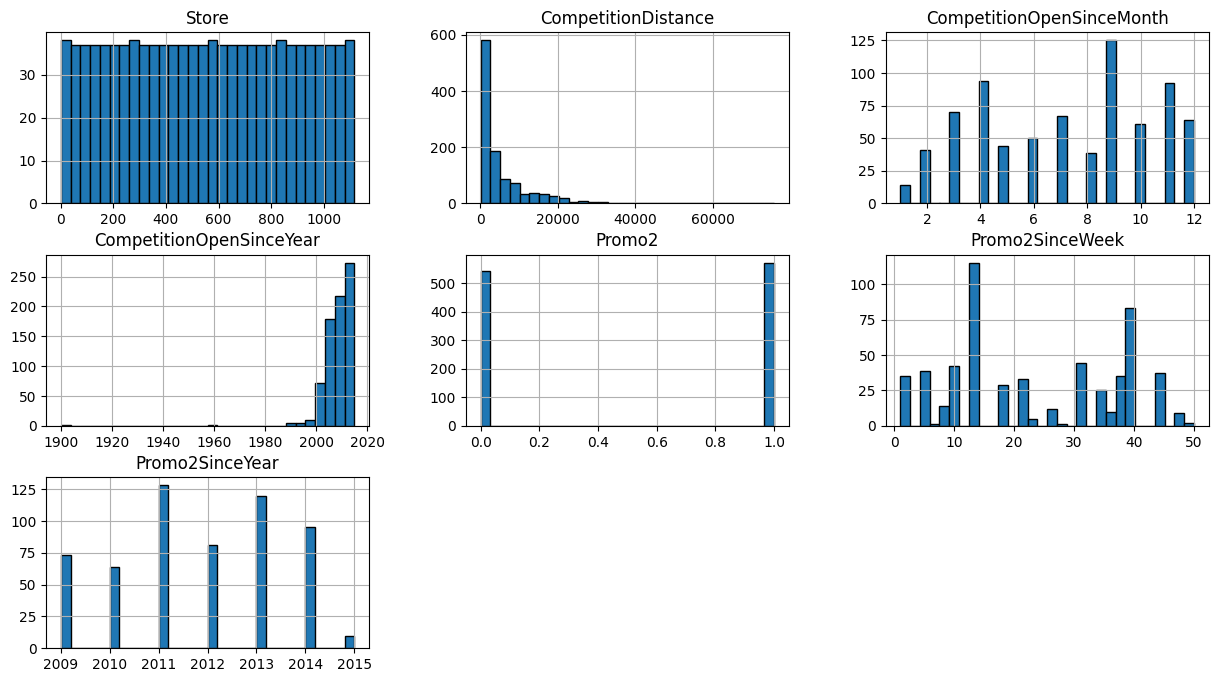

In [39]:
datos_store.hist(figsize=(15,8), bins=30, edgecolor='black')

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Store'}>],
       [<Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Open'}>],
       [<Axes: title={'center': 'Promo'}>,
        <Axes: title={'center': 'SchoolHoliday'}>]], dtype=object)

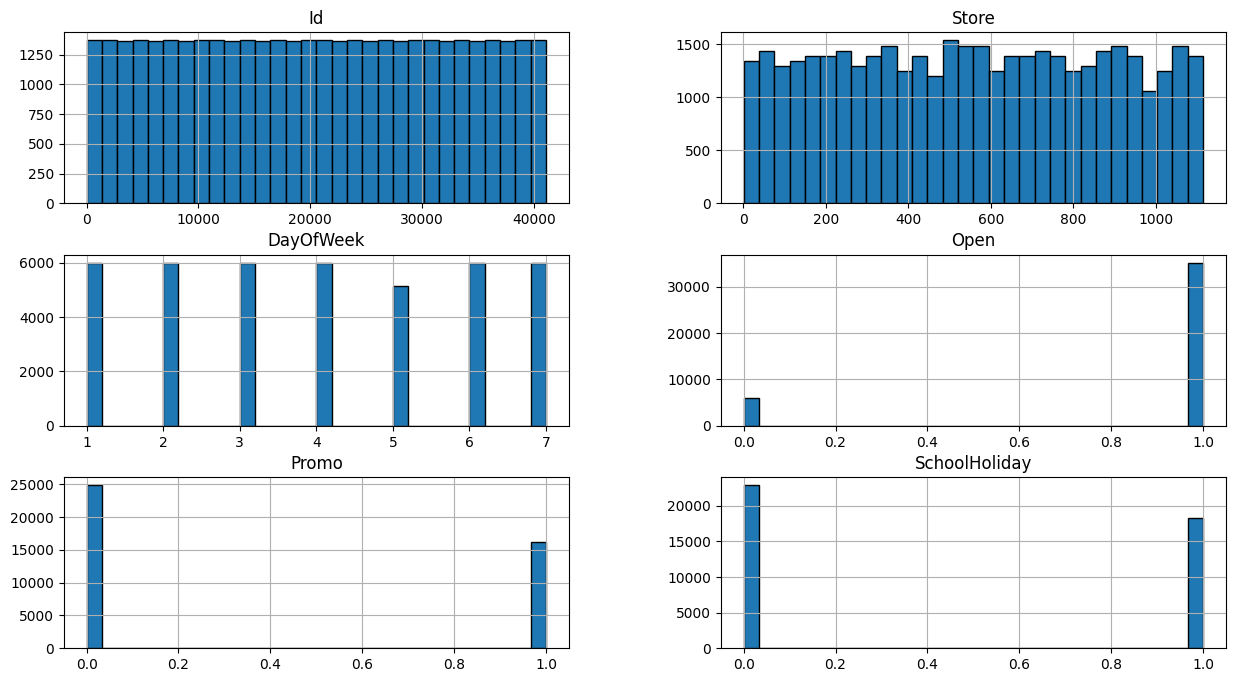

In [40]:
datos_test.hist(figsize=(15,8), bins=30, edgecolor='black')

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

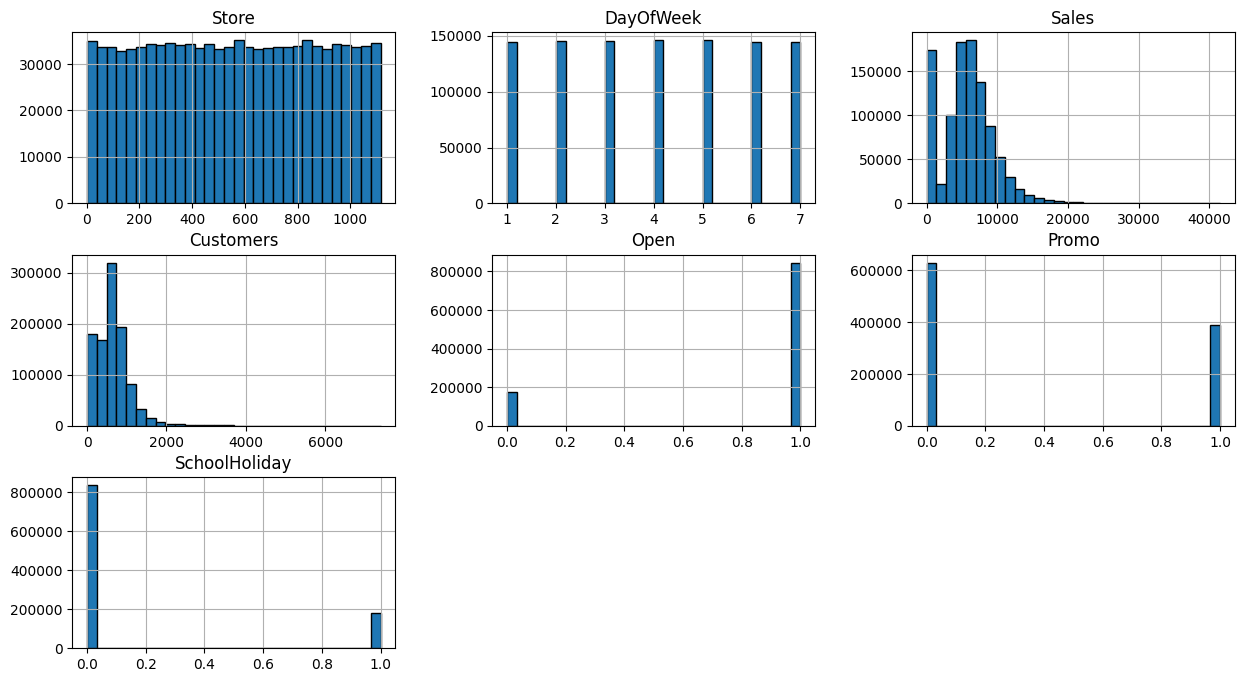

In [41]:
datos_train.hist(figsize=(15,8), bins=30, edgecolor='black')

# **2.Limpieza y Transformación de los Datos**

**2.1 Copiar datasets para no modificar los originales**

In [15]:
df_train = datos_train.copy()
df_test = datos_test.copy()
df_store = datos_store.copy()


**2.2 Manejo de valores nulos**


* CompetitionDistance: si es nulo, ponemos la mediana (valor típico).
*   CompetitionOpenSinceMonth / CompetitionOpenSinceYear: si es nulo, lo dejamos en 0 → sin competencia.
*   Promo2SinceWeek / Promo2SinceYear / PromoInterval: si es nulo, asumimos que no participa en Promo2.
*   Open en test: si es nulo, asumimos que estaba abierta (1).
*  SchoolHoliday en train: si es nulo, ponemos 0.


In [16]:
# Store
df_store['CompetitionDistance'] = df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median())
df_store['CompetitionOpenSinceMonth'] = df_store['CompetitionOpenSinceMonth'].fillna(0)
df_store['CompetitionOpenSinceYear'] = df_store['CompetitionOpenSinceYear'].fillna(0)
df_store['Promo2SinceWeek'] = df_store['Promo2SinceWeek'].fillna(0)
df_store['Promo2SinceYear'] = df_store['Promo2SinceYear'].fillna(0)
df_store['PromoInterval'] = df_store['PromoInterval'].fillna('No Promo')

# Train y Test
df_test['Open'] = df_test['Open'].fillna(1)
df_train['SchoolHoliday'] = df_train['SchoolHoliday'].fillna(0)



**2.3 Conversión de tipos**


*  Convertir Date a formato de fecha (datetime).
*   Columnas categóricas (StoreType, Assortment,
PromoInterval, StateHoliday) a category




In [17]:
# Convertir fechas
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Columnas categóricas
for col in ['StoreType', 'Assortment', 'PromoInterval']:
    df_store[col] = df_store[col].astype('category')

for df in [df_train, df_test]:
    df['StateHoliday'] = df['StateHoliday'].astype('category')


**2.4 Crear variables nuevas**

*   Año, Mes, Día, Semana del año.
*   Más adelante podemos calcular la antigüedad de la competencia y duración de promociones.



In [18]:
for df in [df_train, df_test]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week


**2.5 Verificación**

In [19]:
print(df_store.isnull().sum())
print(df_train.isnull().sum())
print(df_test.isnull().sum())


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
WeekOfYear       0
dtype: int64
Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
WeekOfYear       0
dtype: int64


# 3.**Preparación del Modelo Predictivo**

**3.1 Cargar las librerías necesarias & Preparar dataset final**

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Copiar datasets limpios
df_train_clean = df_train.copy()
df_store_clean = df_store.copy()

# Unir train con store
df = pd.merge(df_train_clean, df_store_clean, on='Store', how='left')

# Revisar primeras filas
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,c,620.0,9.0,2009.0,0,0.0,0.0,No Promo
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0,No Promo


**3.2 Codificar variables categóricas**

In [22]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['StoreType', 'Assortment', 'PromoInterval', 'StateHoliday']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))


**3.3  Seleccionar variables predictoras y target**

In [23]:
# Columnas a eliminar si existen
cols_to_drop = ['Sales', 'Date', 'Customers', 'Id']
cols_to_drop_existing = [col for col in cols_to_drop if col in df.columns]

# Variables predictoras
X = df.drop(columns=cols_to_drop_existing)

# Target
y = df['Sales']


**3.4 Dividir en entrenamiento y validación**

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


**3.5 Entrenar Random Forest**

In [25]:
df_sample = df.sample(frac=0.1, random_state=42)  # 10% de los datos
X = df_sample.drop(columns=cols_to_drop_existing)
y = df_sample['Sales']


In [26]:
rf = RandomForestRegressor(n_estimators=30, random_state=42, n_jobs=-1)


In [27]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=42)

In [28]:
# Predicciones
y_pred = rf.predict(X_val)

In [29]:
# Evaluación
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")

✅ RMSE: 835.38
✅ MAE: 487.14


**3.6 Visualización de predicciones vs reales**

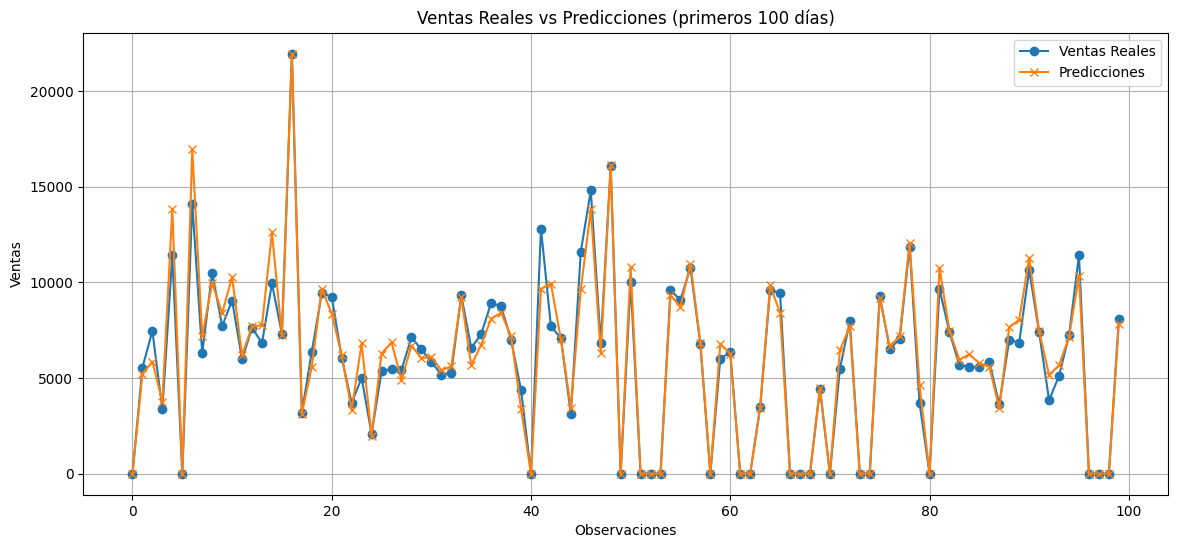

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y_val.values[:100], label='Ventas Reales', marker='o')
plt.plot(y_pred[:100], label='Predicciones', marker='x')
plt.title('Ventas Reales vs Predicciones (primeros 100 días)')
plt.xlabel('Observaciones')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

**3.7 Feature Importance**

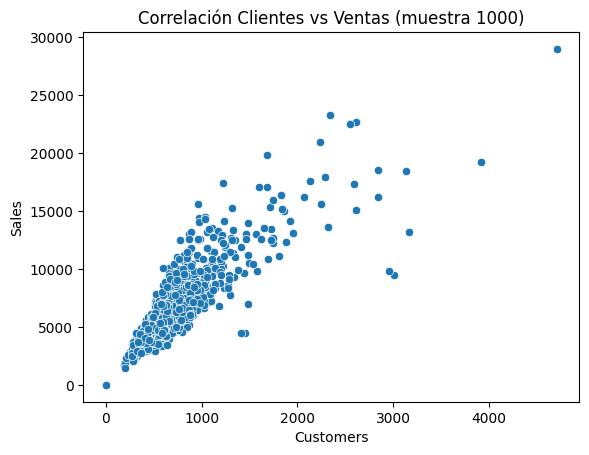

In [38]:
# Correlación clientes vs ventas
sns.scatterplot(data=df.sample(1000), x='Customers', y='Sales')
plt.title('Correlación Clientes vs Ventas (muestra 1000)')
plt.show()

In [31]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values(ascending=False, inplace=True)
print(feat_importances.head(10))  # top 10 variables


Open                         0.459671
CompetitionDistance          0.107065
Store                        0.095959
Promo                        0.073537
CompetitionOpenSinceYear     0.040181
DayOfWeek                    0.038669
CompetitionOpenSinceMonth    0.035537
Day                          0.025909
WeekOfYear                   0.022265
StoreType                    0.019552
dtype: float64


/tmp/ipython-input-2682633986.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values[:10], y=feat_importances.index[:10], palette="viridis")


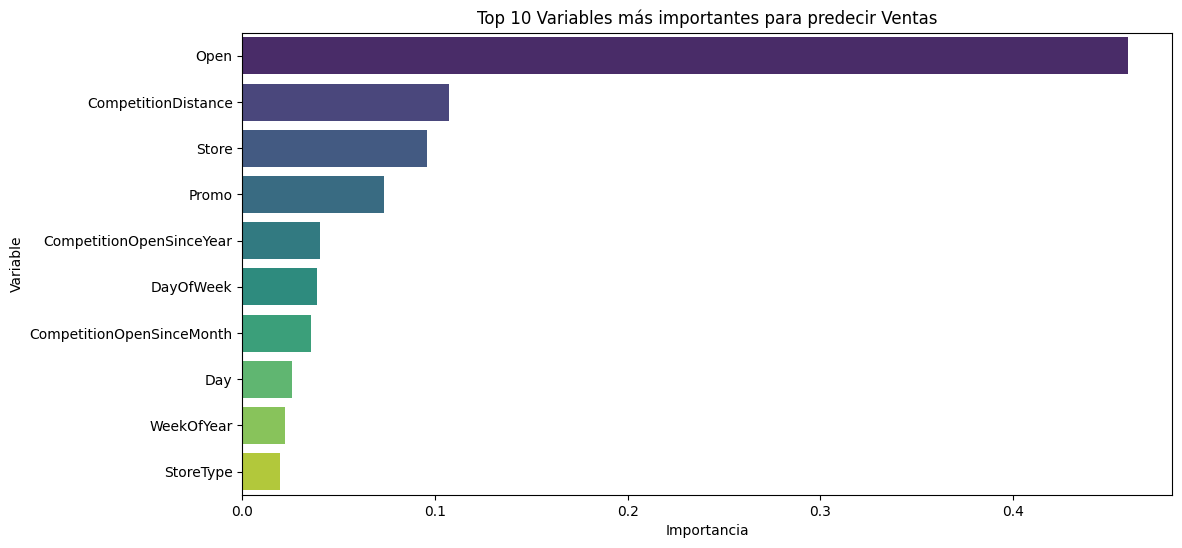

In [32]:
import pandas as pd
import seaborn as sns

importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x=feat_importances.values[:10], y=feat_importances.index[:10], palette="viridis")
plt.title('Top 10 Variables más importantes para predecir Ventas')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()


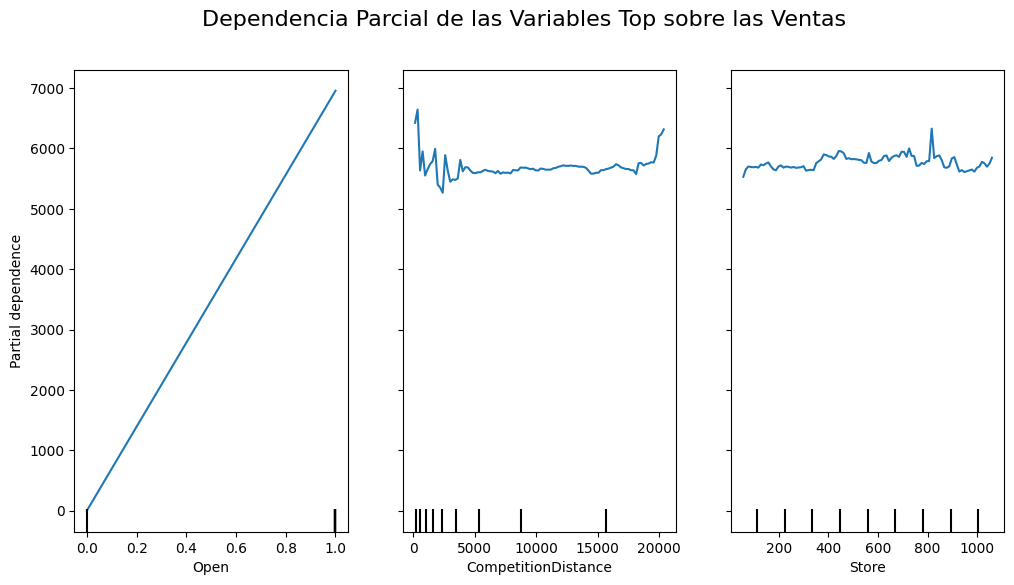

In [34]:
from sklearn.inspection import PartialDependenceDisplay

# Seleccionar top 3 variables más importantes
top_vars = feat_importances.index[:3]

# Crear PDP
fig, ax = plt.subplots(figsize=(12,6))
PartialDependenceDisplay.from_estimator(rf, X_val, features=top_vars, ax=ax)
plt.suptitle('Dependencia Parcial de las Variables Top sobre las Ventas', fontsize=16)
plt.show()


**3.8 Lacertividad o precisión de tu modelo de Random Forest**


*   RMSE: Entre más bajo, mejor; penaliza errores grandes más fuertemente.
*   MAE: Error promedio absoluto; fácil de interpretar en unidades de ventas.
*  R2 Score: Entre 0 y 1; mientras más cerca de 1, mejor el modelo explica la variación de las ventas.



In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predicciones
y_pred = rf.predict(X_val)

# RMSE (Raíz del error cuadrático medio)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# MAE (Error absoluto medio)
mae = mean_absolute_error(y_val, y_pred)

# R2 Score (proporción de varianza explicada, entre 0 y 1)
r2 = r2_score(y_val, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R2 Score: {r2:.4f}")


✅ RMSE: 835.38
✅ MAE: 487.14
✅ R2 Score: 0.9528


##Para Publicar

✅ RMSE: 835.38
✅ MAE: 487.14
✅ R2 Score: 0.9528


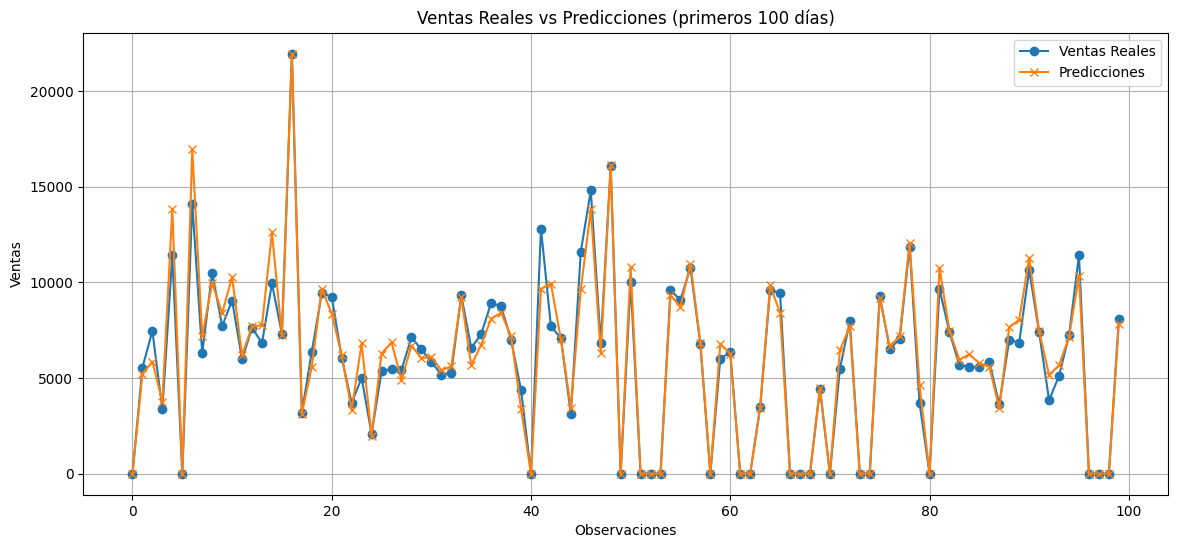

/tmp/ipython-input-3545099117.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values[:10], y=feat_importances.index[:10], palette="viridis")


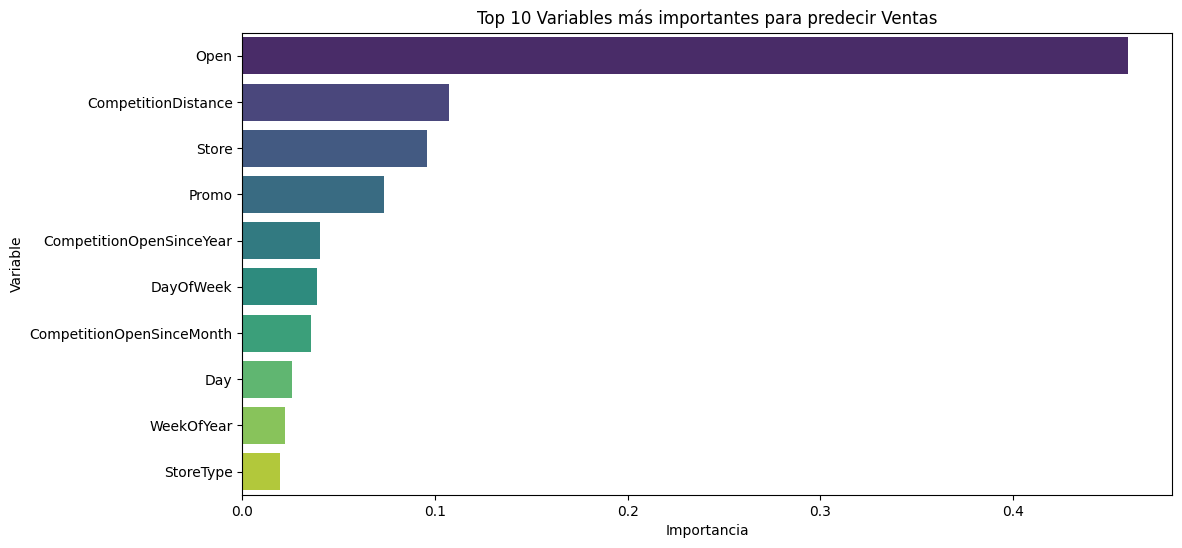

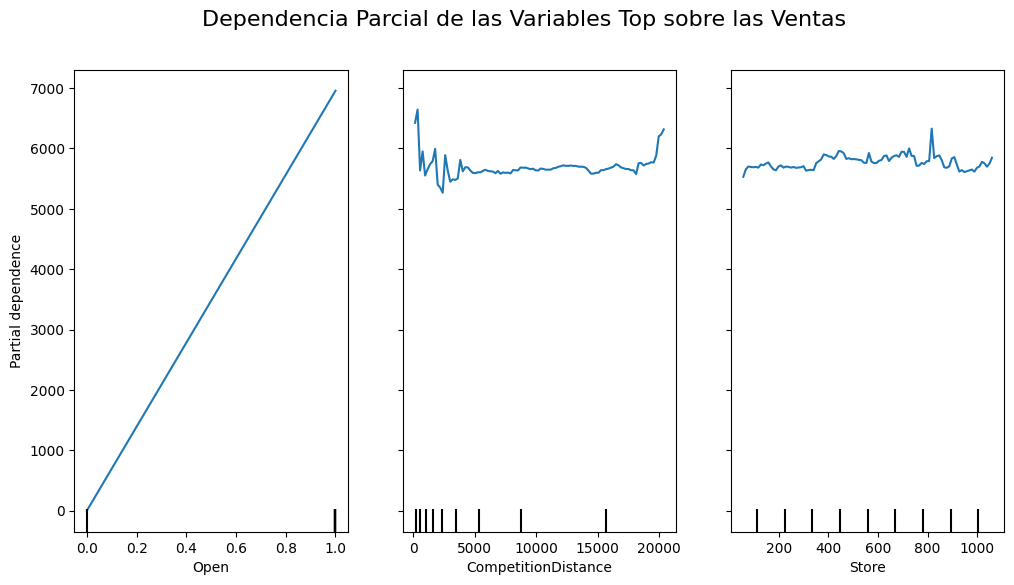

In [35]:
# ===============================
# 0️⃣ Importar librerías
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

# ===============================
# 1️⃣ Preparar dataset final
# ===============================
df_train_clean = df_train.copy()
df_store_clean = df_store.copy()

# Unir train con store
df = pd.merge(df_train_clean, df_store_clean, on='Store', how='left')

# ===============================
# 2️⃣ Codificar variables categóricas
# ===============================
cat_cols = ['StoreType', 'Assortment', 'PromoInterval', 'StateHoliday']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# ===============================
# 3️⃣ Seleccionar variables predictoras y target
# ===============================
cols_to_drop = ['Sales', 'Date', 'Customers', 'Id']
cols_to_drop_existing = [col for col in cols_to_drop if col in df.columns]

X = df.drop(columns=cols_to_drop_existing)
y = df['Sales']

# ===============================
# 4️⃣ Dividir en entrenamiento y validación
# ===============================
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# 5️⃣ Entrenar Random Forest
# ===============================
rf = RandomForestRegressor(n_estimators=30, random_state=42, n_jobs=-1)  # menos árboles para que sea rápido
rf.fit(X_train, y_train)

# ===============================
# 6️⃣ Evaluación del modelo
# ===============================
y_pred = rf.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R2 Score: {r2:.4f}")

# ===============================
# 7️⃣ Gráfico Predicciones vs Reales
# ===============================
plt.figure(figsize=(14,6))
plt.plot(y_val.values[:100], label='Ventas Reales', marker='o')
plt.plot(y_pred[:100], label='Predicciones', marker='x')
plt.title('Ventas Reales vs Predicciones (primeros 100 días)')
plt.xlabel('Observaciones')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

# ===============================
# 8️⃣ Gráfico de Importancia de Variables
# ===============================
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x=feat_importances.values[:10], y=feat_importances.index[:10], palette="viridis")
plt.title('Top 10 Variables más importantes para predecir Ventas')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

# ===============================
# 9️⃣ Partial Dependence Plots (PDP)
# ===============================
top_vars = feat_importances.index[:3]  # top 3 variables
fig, ax = plt.subplots(figsize=(12,6))
PartialDependenceDisplay.from_estimator(rf, X_val, features=top_vars, ax=ax)
plt.suptitle('Dependencia Parcial de las Variables Top sobre las Ventas', fontsize=16)
plt.show()
